In [1]:
%matplotlib inline
# %matplotlib qt
# import mpld3
# mpld3.enable_notebook() # seems to just freeze the stuff a bit
# import matplotlib
# matplotlib.use('nbagg') # also slow AF

In [2]:
from __future__ import print_function, division
import os, sys
import numpy as np, scipy as sp
import scipy.io
import scipy.signal as signal
import scipy.stats
import scipy.fftpack as ftpk
import matplotlib.pyplot as plt
import matplotlib

In [3]:
e = np.exp(1)
pi = np.pi
pii = np.pi*1j
twopi = np.pi * 2

In [4]:
import pywt
# import pyhht
# import pyhht.emd

In [5]:
from imp import reload
import glob

In [6]:
# os.chdir('..')
os.chdir('/home/mike/ve/ml/')
print(os.getcwd())
from eegkaggle.vectorizers import naive, spectral
from eegkaggle.dio import dataio
from eegkaggle.plotting import plotstuff
from eegkaggle.msignal import wavelets, metrics, auxfilter

/home/mike/ve/ml


In [7]:
reload(plotstuff)
reload(spectral)

<module 'eegkaggle.vectorizers.spectral' from 'eegkaggle/vectorizers/spectral.pyc'>

In [8]:
matplotlib.style.use('ggplot')

In [9]:
ssmall,smed, slarge, slong = (4,3), (8,6), (16,12), (16,4)
matplotlib.rcParams['figure.figsize'] = slong

Functions

In [10]:
# this needs to be here because...reasons?
def pltcwt(plt, my_cwt, widths, realize=None):
    hi = np.max(widths)
    lo = np.min(widths)
    if realize == 'abs':
        my_cwt = np.abs(my_cwt)
    elif realize == 'ang':
        my_cwt = np.angle(my_cwt)
    plt.imshow(my_cwt, extent=[-1, 1, hi, lo], cmap='seismic', aspect='auto',
               vmax=abs(my_cwt).max(), vmin=-abs(my_cwt).max())


def plt_easycwt(plt, sig, widths):
    my_cwt = signal.cwt(sig, signal.ricker, widths)
    pltcwt(plt, my_cwt, widths)

Data loading section

In [11]:
basepath = '/run/media/mike/Elements/data/kaggle/melbourne/train_all/'
sources1 = glob.glob(basepath + '*_1.mat') 
sources0 = glob.glob(basepath + '*_0.mat') 

basepathT = '/media/mike/Elements/data/kaggle/melbourne/test_3/'
basepathT = '/home/mike/Downloads/test_1_new/'

sourcesT = glob.glob(basepath + '*.mat') 


In [12]:
basepath = '/home/mike/Downloads/train_1/'
path = basepath + '1_100_0.mat'
nfile=120
nfile2=100
rawdata = dataio.get_matlab_eeg_data(sources0[nfile])
data = rawdata['data']
data1=dataio.get_matlab_eeg_data_ary(sources1[nfile2])
print(data.shape)
SR = rawdata['iEEGsamplingRate'][0][0]
if SR == int(SR):
    SR = int(SR)
print(SR)

(240000, 16)
400


In [13]:
brief = data[:SR*120]
brief.shape
bb = brief

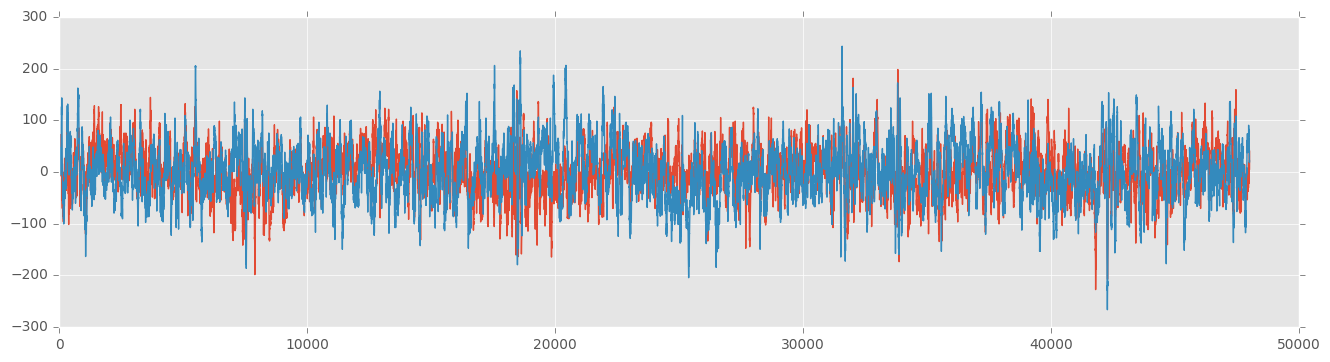

In [14]:
plt.plot(brief[:,:2])

eegkaggle/vectorizers/spectral.py:126: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  spectrum = fftpack.fft(datachunk, axis=0)[:cutIndex]


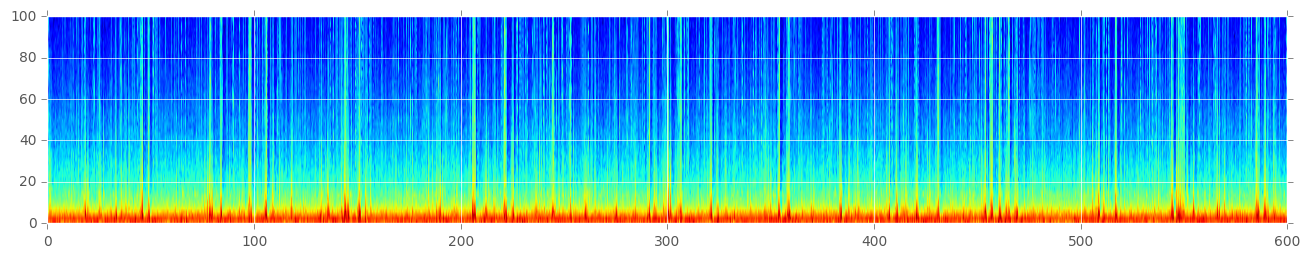

In [15]:
spec0 = spectral.file_to_fig(sources0[nfile], returnspec=1)

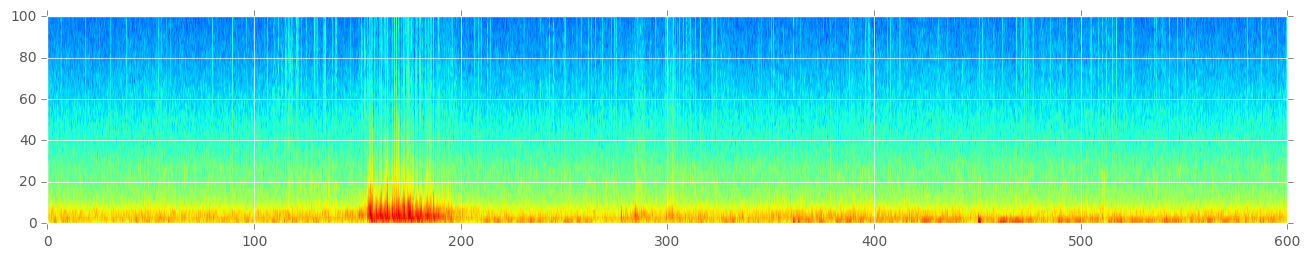

In [16]:
spec1 = spectral.file_to_fig(sources1[100], returnspec=1)

In [17]:
eeg1 = brief[:,0]
eeg2 = brief[:,1]
aeeg1 = signal.hilbert(eeg1)

In [18]:
lo, hi = 1, 16
nbins = 32
widths = np.linspace(lo, hi, nbins)**2

In [19]:
data.shape

(240000, 16)

In [20]:
sig = data[:, 0]
fsig = ftpk.fft(data, axis=0)
t = np.linspace(0, 400, len(fsig))

fsig.shape


(240000, 16)

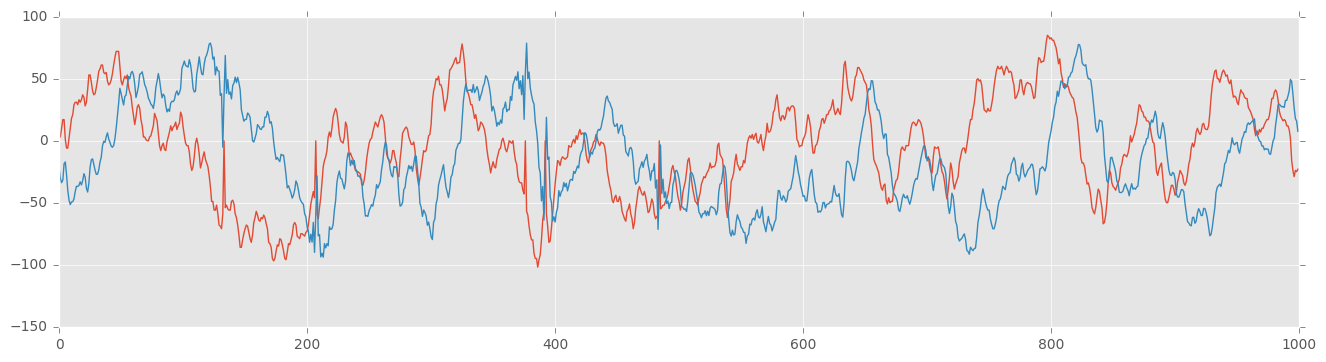

In [21]:
n = 1000
plt.plot(eeg1[:n])
plt.plot(np.imag(aeeg1[:n]))

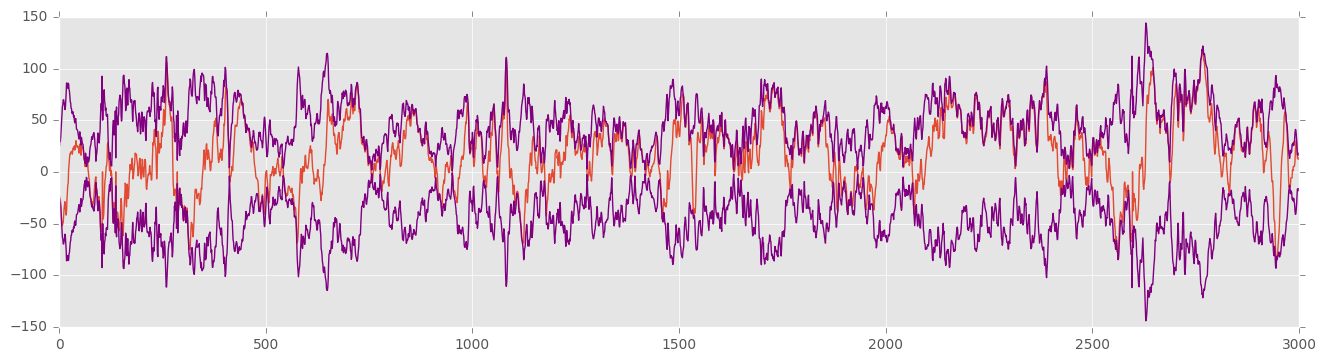

In [34]:
n = 10000
t = 3000
plt.plot(eeg1[n:n+t])
plt.plot(np.abs(aeeg1[n:n+t]), 'purple')
plt.plot(-np.abs(aeeg1[n:n+t]), 'purple')

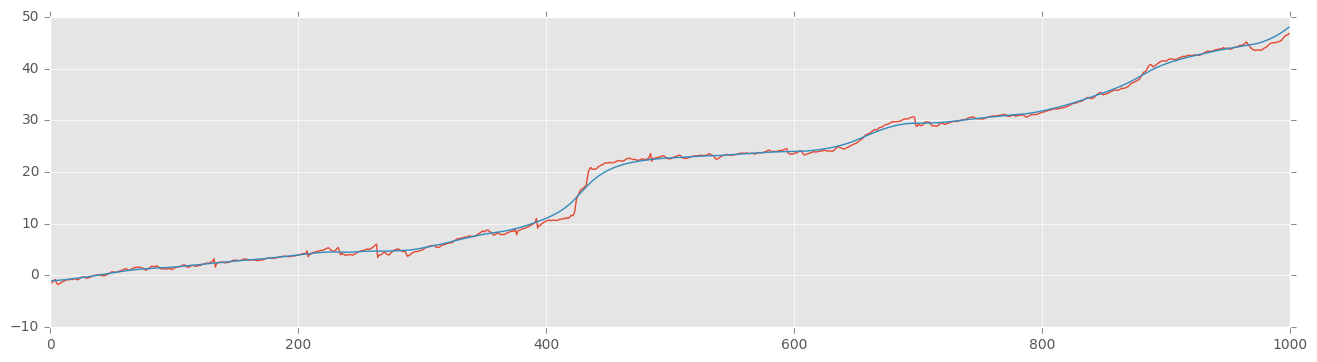

In [23]:
iphase = np.unwrap(np.angle(aeeg1))
iphase_ = auxfilter.butterfilt(iphase, .01)
plt.plot(iphase[:n])
plt.plot(iphase_[:n])

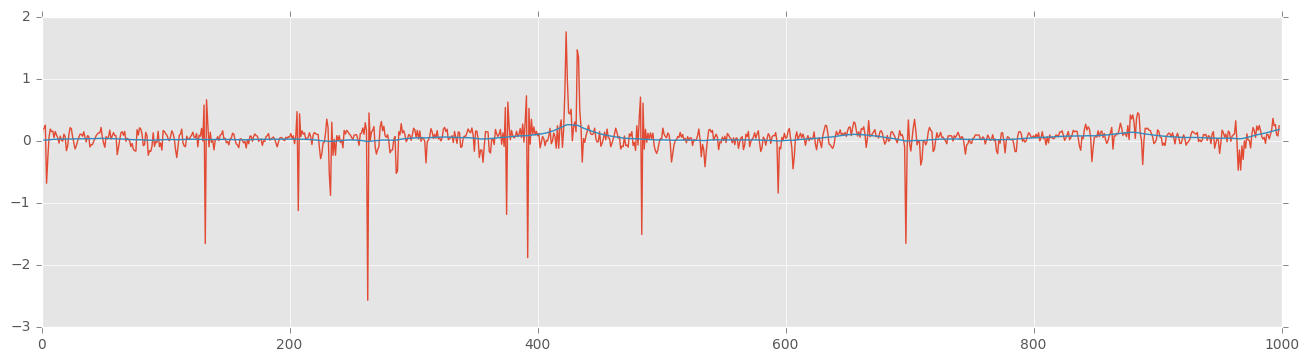

In [24]:
plt.plot(np.diff(iphase[:n]))
plt.plot(np.diff(iphase_[:n]))
# plt.plot(np.imag(signal.hilbert(iphase_))[:n]) # explodes

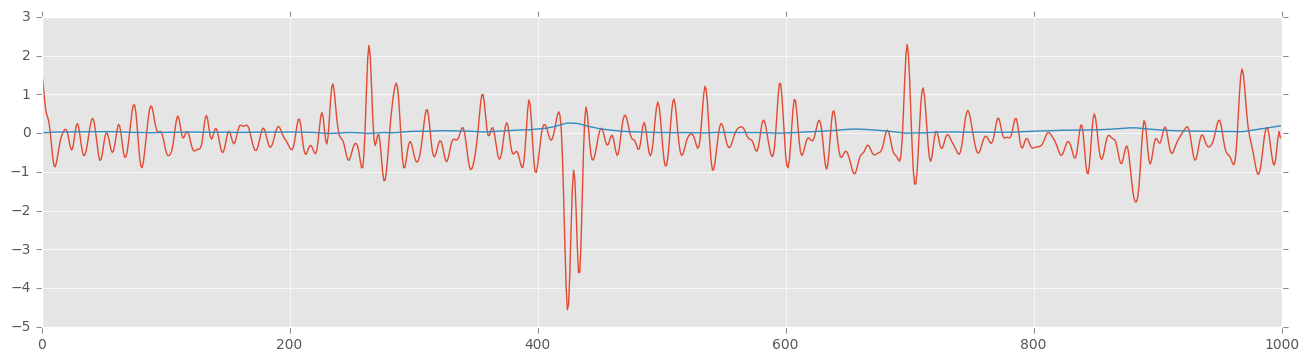

In [25]:
cwt_i = signal.cwt(iphase, wavelets.CWTlets.ricker_i, [3]).T
cwt_i.shape
plt.plot(cwt_i[:n])
plt.plot(np.diff(iphase_)[:n])

(0.00047957015424+0j)


/home/mike/ve/ml/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


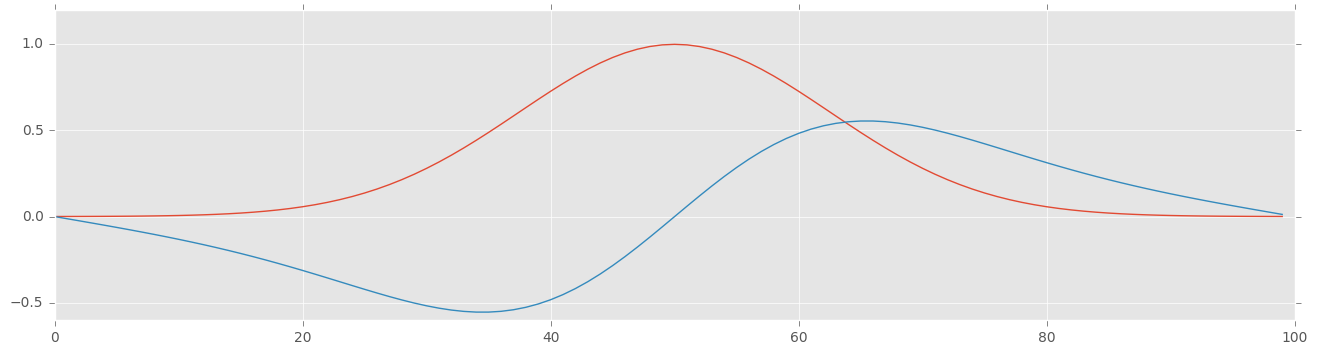

In [26]:
reload(wavelets)
y = wavelets.CWTlets.gausslet(100,10)
print(y[1])
plt.plot(wavelets.CWTlets.gausslet(100,10))
plt.plot(wavelets.CWTlets.igausslet(100,10))

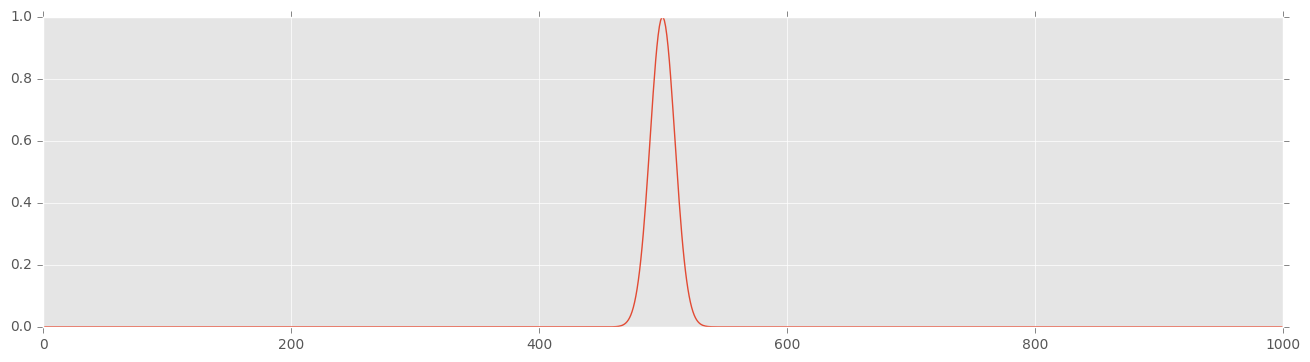

In [27]:
plt.plot(signal.gaussian(1000, 1000/100))